In [2]:
import json, os
import pandas as pd
import numpy as np
import glob
from flatten_dict import flatten
import matplotlib.pyplot as plt

c0 = '#89CFF0'

c1 = '#264653'
c2 = '#2a9d8f'
c3 = '#e9c46a'
c4 = '#f4a261'
c5 = '#e76f51'

In [3]:
df = pd.DataFrame()
list = [ 'timesteps_total', 'custom_metrics\\tax_US_brackets/total_collected_taxes_mean', 'custom_metrics\\tax_ITA_brackets/avg_effective_tax_rate_mean','custom_metrics\\tax/avg_effective_tax_rate_mean', 'info\\learner\\learned\\cur_lr', 'custom_metrics\\labor/weighted_cost_mean', 'custom_metrics\\social/productivity_mean',  'custom_metrics\\social/equality_mean','custom_metrics\\util/0_mean']
with open("D:/Uni/2nd LMEC/Tesi/Nuova cartella/DATI/result_phase1.json") as f:
    for idx, line in enumerate(f):
        temp = json.loads(line)
        dict_temp =flatten(temp, reducer='path')
        newDict = dict()
        for (key, value) in dict_temp.items():
            if type(value) == float or type(value) == int:
                if key in list:
                    newDict[key] = value
        df2 = pd.DataFrame(newDict, index = [idx])
        df = df.append(df2)

In [4]:
def smooth(scalars):
    weight = .99  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = []
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed

<AxesSubplot:title={'center':'Labor weighted cost'}>

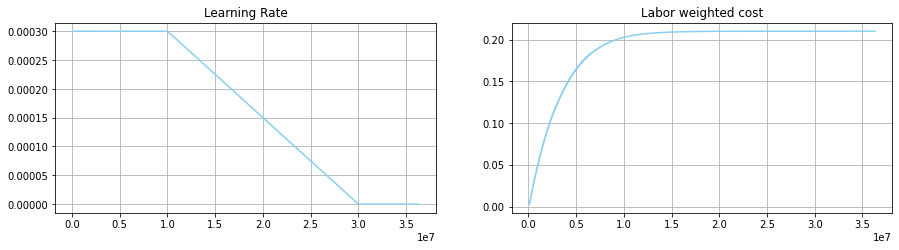

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,3.5)
df.plot(ax=axes[0],x = 'timesteps_total',y = 'info\\learner\\learned\\cur_lr', legend = False, title = "Learning Rate" , xlabel = "", grid = True, color = c0)
df.plot(ax=axes[1],x = 'timesteps_total',y = 'custom_metrics\\labor/weighted_cost_mean', legend = False, title = "Labor weighted cost" , xlabel = "", grid = True, color = c0)


<AxesSubplot:title={'center':'Average Productivity'}>

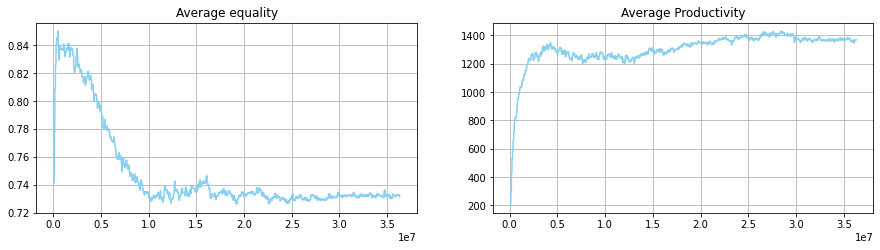

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,3.5)
df.plot(ax=axes[0],x = 'timesteps_total',y = 'custom_metrics\\social/equality_mean', legend = False, title = "Average equality" , xlabel = "", grid = True, color = c0)
df.plot(ax=axes[1],x = 'timesteps_total',y = 'custom_metrics\\social/productivity_mean', legend = False, title = "Average Productivity" , xlabel = "", grid = True, color = c0)


In [7]:
dfUS = pd.DataFrame()

with open("D:/Uni/2nd LMEC/Tesi/Nuova cartella/DATI/result_us.json") as f:
    for idx, line in enumerate(f):
        temp = json.loads(line)
        dict_temp =flatten(temp, reducer='path')
        newDict = dict()
        for (key, value) in dict_temp.items():
            if type(value) == float or type(value) == int:
                if key in list:
                    newDict[key] = value
        df2 = pd.DataFrame(newDict, index = [idx])
        dfUS = dfUS.append(df2)

In [8]:
dfITA = pd.DataFrame()
with open("D:/Uni/2nd LMEC/Tesi/Nuova cartella/DATI/result_ita.json") as f:
    for idx, line in enumerate(f):
        temp = json.loads(line)
        dict_temp =flatten(temp, reducer='path')
        newDict = dict()
        for (key, value) in dict_temp.items():
            if type(value) == float or type(value) == int:
                if key in list:
                    newDict[key] = value
        df2 = pd.DataFrame(newDict, index = [idx])
        dfITA = dfITA.append(df2)

In [9]:
dfFree = pd.DataFrame()
with open("D:/Uni/2nd LMEC/Tesi/Nuova cartella/DATI/result_free.json") as f:
    for idx, line in enumerate(f):
        temp = json.loads(line)
        dict_temp =flatten(temp, reducer='path')
        newDict = dict()
        for (key, value) in dict_temp.items():
            if type(value) == float or type(value) == int:
                if key in list:
                    newDict[key] = value
        df2 = pd.DataFrame(newDict, index = [idx])
        dfFree = dfFree.append(df2)

In [10]:
dfComm = pd.DataFrame()
with open("D:/Uni/2nd LMEC/Tesi/Nuova cartella/DATI/result_comm.json") as f:
    for idx, line in enumerate(f):
        temp = json.loads(line)
        dict_temp =flatten(temp, reducer='path')
        newDict = dict()
        for (key, value) in dict_temp.items():
            if type(value) == float or type(value) == int:
                if key in list:
                    newDict[key] = value
        df2 = pd.DataFrame(newDict, index = [idx])
        dfComm = dfComm.append(df2)

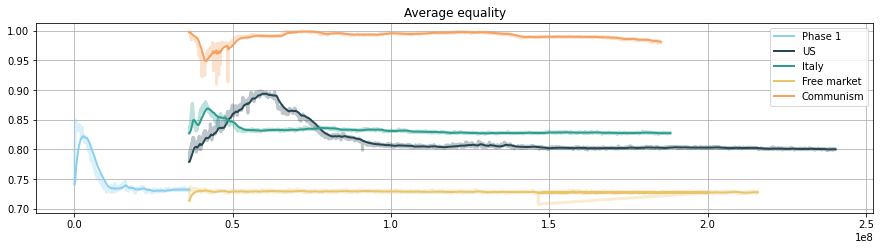

In [11]:
fig, axes = plt.subplots()
fig.set_size_inches(15,3.5)
ystr = 'custom_metrics\\social/equality_mean'

df.plot(ax=axes,x = 'timesteps_total',y = ystr, legend = False, title = "Average equality" , xlabel = "", grid = True, alpha= 0.3, color = c0, lw=3)
line1, = axes.plot(df['timesteps_total'], smooth(df[ystr]), color = c0, lw=2)
dfUS.plot(ax=axes,x = 'timesteps_total',y =ystr, legend = False , xlabel = "", grid = True, alpha = 0.3, color = c1, lw=3)
line2, = axes.plot(dfUS['timesteps_total'], smooth(dfUS[ystr]), color = c1, lw=2)
dfITA.plot(ax=axes,x = 'timesteps_total',y = ystr, legend = False , xlabel = "", grid = True, alpha = 0.3, color = c2, lw=3)
line3, =axes.plot(dfITA['timesteps_total'], smooth(dfITA[ystr]), color = c2, lw=2)
dfFree.plot(ax=axes,x = 'timesteps_total',y = ystr , legend = False, xlabel = "", grid = True, alpha = 0.3, color = c3, lw=3)
line4, = axes.plot(dfFree['timesteps_total'], smooth(dfFree[ystr]), color = c3, lw=2)
dfComm.plot(ax=axes,x = 'timesteps_total',y = ystr , legend = False, xlabel = "", grid = True, alpha = 0.3, color = c4, lw=3)
line5, = axes.plot(dfComm['timesteps_total'], smooth(dfComm[ystr]), color = c4, lw=2)
axes.legend([line1, line2,line3,line4,line5],['Phase 1','US','Italy','Free market', 'Communism'])

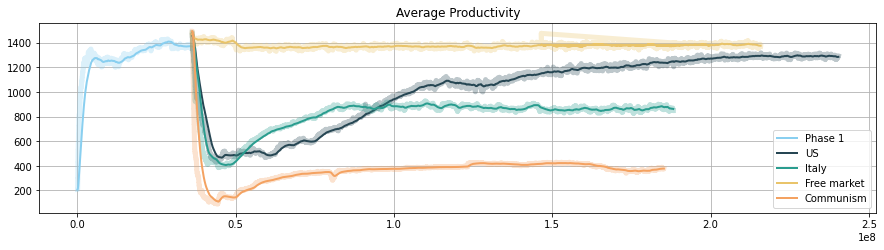

In [12]:
fig, axes = plt.subplots()
fig.set_size_inches(15,3.5)
ystr = 'custom_metrics\\social/productivity_mean'

df.plot(ax=axes,x = 'timesteps_total',y = ystr, label = False, title = "Average Productivity" , xlabel = "", grid = True, alpha= 0.3, color = c0, lw=5)
line1, = axes.plot(df['timesteps_total'], smooth(df[ystr]), color = c0, lw=2)
dfUS.plot(ax=axes,x = 'timesteps_total',y =ystr, legend = False , xlabel = "", grid = True, alpha = 0.3, color = c1, lw=5)
line2, = axes.plot(dfUS['timesteps_total'], smooth(dfUS[ystr]), color = c1, lw=2)
dfITA.plot(ax=axes,x = 'timesteps_total',y = ystr, legend = False , xlabel = "", grid = True, alpha = 0.3, color = c2, lw=5)
line3, =axes.plot(dfITA['timesteps_total'], smooth(dfITA[ystr]), color = c2, lw=2)
dfFree.plot(ax=axes,x = 'timesteps_total',y = ystr , legend = False, xlabel = "", grid = True, alpha = 0.3, color = c3, lw=5)
line4, = axes.plot(dfFree['timesteps_total'], smooth(dfFree[ystr]), color = c3, lw=2)
dfComm.plot(ax=axes,x = 'timesteps_total',y = ystr , legend = False, xlabel = "", grid = True, alpha = 0.3, color = c4, lw=5)
line5, = axes.plot(dfComm['timesteps_total'], smooth(dfComm[ystr]), color = c4, lw=2)
axes.legend([line1, line2,line3,line4,line5],['Phase 1','US','Italy','Free market', 'Communism'])

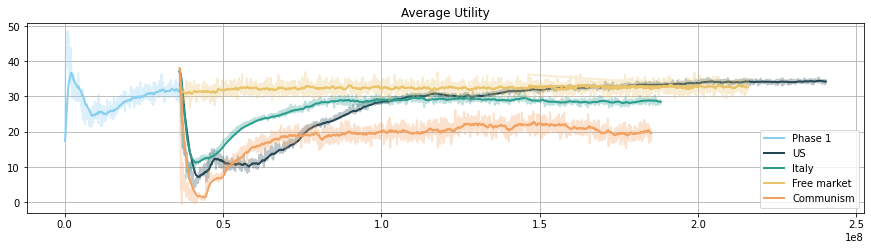

In [13]:
fig, axes = plt.subplots()
fig.set_size_inches(15,3.5)
ystr = 'custom_metrics\\util/0_mean'

df.plot(ax=axes,x = 'timesteps_total',y = ystr, label = False, title = "Average Utility" , xlabel = "", grid = True, alpha= 0.3, color = c0, lw=2)
line1, = axes.plot(df['timesteps_total'], smooth(df[ystr]), color = c0, lw=2)
dfUS.plot(ax=axes,x = 'timesteps_total',y =ystr, legend = False , xlabel = "", grid = True, alpha = 0.3, color = c1, lw=2)
line2, = axes.plot(dfUS['timesteps_total'], smooth(dfUS[ystr]), color = c1, lw=2)
dfITA.plot(ax=axes,x = 'timesteps_total',y = ystr, legend = False , xlabel = "", grid = True, alpha = 0.3, color = c2, lw=2)
line3, =axes.plot(dfITA['timesteps_total'], smooth(dfITA[ystr]), color = c2, lw=2)
dfFree.plot(ax=axes,x = 'timesteps_total',y = ystr , legend = False, xlabel = "", grid = True, alpha = 0.3, color = c3, lw=2)
line4, = axes.plot(dfFree['timesteps_total'], smooth(dfFree[ystr]), color = c3, lw=2)
dfComm.plot(ax=axes,x = 'timesteps_total',y = ystr , legend = False, xlabel = "", grid = True, alpha = 0.3, color = c4, lw=2)
line5, = axes.plot(dfComm['timesteps_total'], smooth(dfComm[ystr]), color = c4, lw=2)
axes.legend([line1, line2,line3,line4,line5],['Phase 1','US','Italy','Free market', 'Communism'])
